In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp -r '/content/drive/MyDrive/Capstone/Dataset_Comp.zip' /content/Dataset

In [ ]:
!unzip '/content/Dataset'

Archive:  /content/Dataset
   creating: Dataset_Comp/
   creating: Dataset_Comp/Dataset_Capstone/
   creating: Dataset_Comp/Dataset_Capstone/Test/
   creating: Dataset_Comp/Dataset_Capstone/Test/Buku/
  inflating: Dataset_Comp/Dataset_Capstone/Test/Buku/#17.jpeg  
  inflating: Dataset_Comp/Dataset_Capstone/Test/Buku/#books #classics.jpeg  
Dataset_Comp/Dataset_Capstone/Test/Buku/% 🪐᩠ ꒱_ ˖ ࣪ 𓇬.jpeg:  mismatching "local" filename (Dataset_Comp/Dataset_Capstone/Test/Buku/% ЁЯкРсйа ъТ▒_ ╦Ц ргк ЁУЗм.jpeg),
         continuing with "central" filename version
  inflating: Dataset_Comp/Dataset_Capstone/Test/Buku/% 🪐᩠ ꒱_ ˖ ࣪ 𓇬.jpeg  
  inflating: Dataset_Comp/Dataset_Capstone/Test/Buku/00a1645d-f2fc-4ea3-897c-f19a4478b3fb.jpeg  
  inflating: Dataset_Comp/Dataset_Capstone/Test/Buku/00ee7221-9767-457f-b924-13abde275a90.jpeg  
  inflating: Dataset_Comp/Dataset_Capstone/Test/Buku/01a5ba50-b242-45e9-91a9-d9178d608668.jpeg  
  inflating: Dataset_Comp/Dataset_Capstone/Test/Buku/0d5f8589-eded-46b5-bc47

In [ ]:
# Apply data augmentation
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/content/Dataset_Comp/Dataset_Capstone/Train',  # This is the source directory for training images
        target_size=(500, 500),  # All images will be resized to 300x300
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical',
        shuffle = True)

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/content/Dataset_Comp/Dataset_Capstone/Test',  # This is the source directory for validation images
        target_size=(500, 500),  # All images will be resized to 300x300
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical',
        shuffle = False)

Found 1218 images belonging to 3 classes.
Found 522 images belonging to 3 classes.


In [ ]:
print(train_generator.class_indices)

{'Buku': 0, 'Sepatu': 1, 'Tas': 2}


In [ ]:
base_model = VGG16(weights = "imagenet", include_top = False, input_shape = (500, 500, 3))
base_model.trainable = False
x = base_model.output
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(256, activation = 'relu')(x)
pred = tf.keras.layers.Dense(3, activation = 'softmax')(x)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
model = tf.keras.models.Model(inputs = base_model.input, outputs = pred)

In [ ]:
model.summary()
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
    rankdir="TB"
)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500, 500, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 500, 500, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 500, 500, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 250, 250, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 250, 250, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 250, 250, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 125, 125, 128)     0     

In [ ]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    metrics = ['accuracy']
)

In [ ]:
history = model.fit(
      train_generator,
      epochs=10,
      verbose=1,
      validation_data = validation_generator,
      )

Epoch 1/10
 1/10 [==>...........................] - ETA: 1:25 - loss: 2.0696 - accuracy: 0.3788

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


10/10 [==============================] - 170s 18s/step - loss: 26.4162 - accuracy: 0.3292 - val_loss: 8.3551 - val_accuracy: 0.4387
Epoch 2/10
10/10 [==============================] - 166s 17s/step - loss: 4.4656 - accuracy: 0.5788 - val_loss: 1.3110 - val_accuracy: 0.7548
Epoch 3/10
10/10 [==============================] - 166s 17s/step - loss: 1.4867 - accuracy: 0.7167 - val_loss: 0.5504 - val_accuracy: 0.8525
Epoch 4/10
10/10 [==============================] - 166s 17s/step - loss: 0.8640 - accuracy: 0.7718 - val_loss: 0.7089 - val_accuracy: 0.7931
Epoch 5/10
10/10 [==============================] - 167s 18s/step - loss: 0.5679 - accuracy: 0.8309 - val_loss: 0.2929 - val_accuracy: 0.8908
Epoch 6/10
10/10 [==============================] - 164s 16s/step - loss: 0.3013 - accuracy: 0.9031 - val_loss: 0.2701 - val_accuracy: 0.9176
Epoch 7/10
10/10 [==============================] - 166s 17s/step - loss: 0.2732 - accuracy: 0.9056 - val_loss: 0.2337 - val_accuracy: 0.9042
Epoch 8/10
10/10

In [ ]:
model.save('Model_exp_TL_2_V_1_0.keras')

In [ ]:
!cp Model_exp_TL_2_V_1_0.keras /content/drive/MyDrive/Capstone/Models_Saved

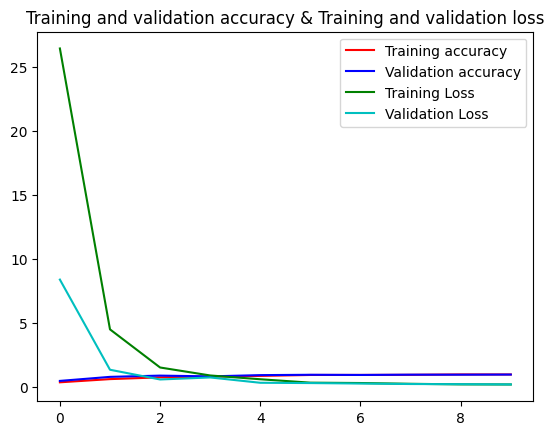

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# Plot the model results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.plot(epochs, loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'c', label='Validation Loss')
plt.title('Training and validation accuracy & Training and validation loss')
plt.legend()
plt.figure()
plt.show()


In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = load_img(path, target_size=(500, 500))
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  predicted_class_index = np.argmax(classes)
  class_names = ['Buku', 'Sepatu', 'Tas']
  predicted_class = class_names[predicted_class_index]


  print(fn)
  print(classes)
  print(f"Predicted class: {predicted_class}")

Saving WhatsApp Image 2024-05-22 at 14.21.33_75748490.jpg to WhatsApp Image 2024-05-22 at 14.21.33_75748490.jpg
1/1 [==============================] - 0s 177ms/step
WhatsApp Image 2024-05-22 at 14.21.33_75748490.jpg
[[0. 1. 0.]]
Predicted class: Sepatu
